# Получение данных

Мы получаем данные временного ряда для анализа. Используем библиотеку `yfinance` для загрузки ежедневных цен закрытия акций Apple Inc. (AAPL) с 1 января 2018 года по 1 января 2023 года. Это дает примерно 5 лет ежедневных данных, что достаточно для визуализации трендов и циклических компонентов. Столбец 'Close' извлекается как наш временной ряд.

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01', interval='1d')
closing_prices = data['Close']

# Построение исходного ряда и разностных рядов разного порядка

Здесь мы визуализируем исходный временной ряд - ежедневные цены закрытия акций AAPL, а так же графики разностных рядов различного порядка (1-ого и 2-ого). Исходный график помогает нам наблюдать за общим поведением данных, например, за тенденциями или потенциальной сезонностью. Как правило, в ценах на акции с течением времени наблюдается четкий восходящий тренд, что может указывать на нестационарность.

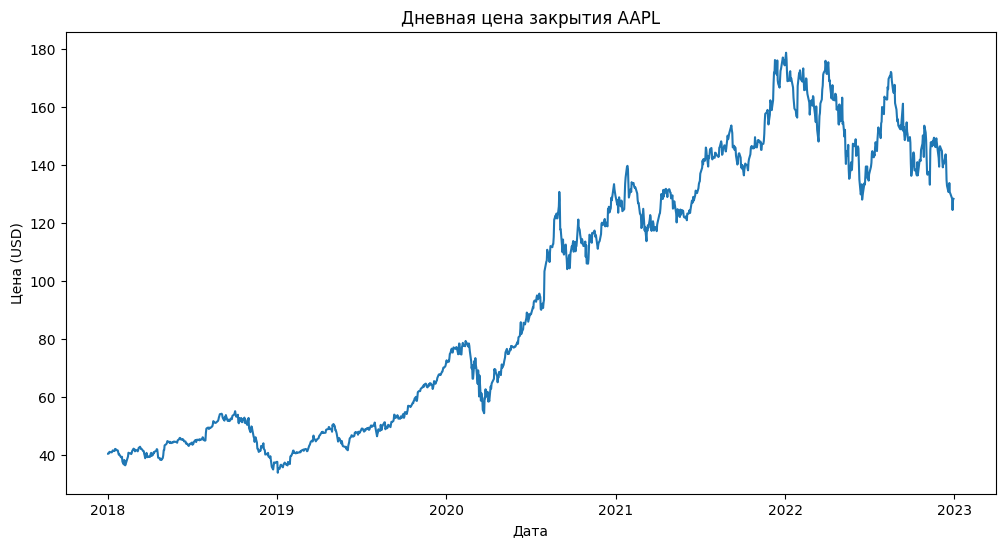

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(closing_prices)
plt.title('Дневная цена закрытия AAPL')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.show()

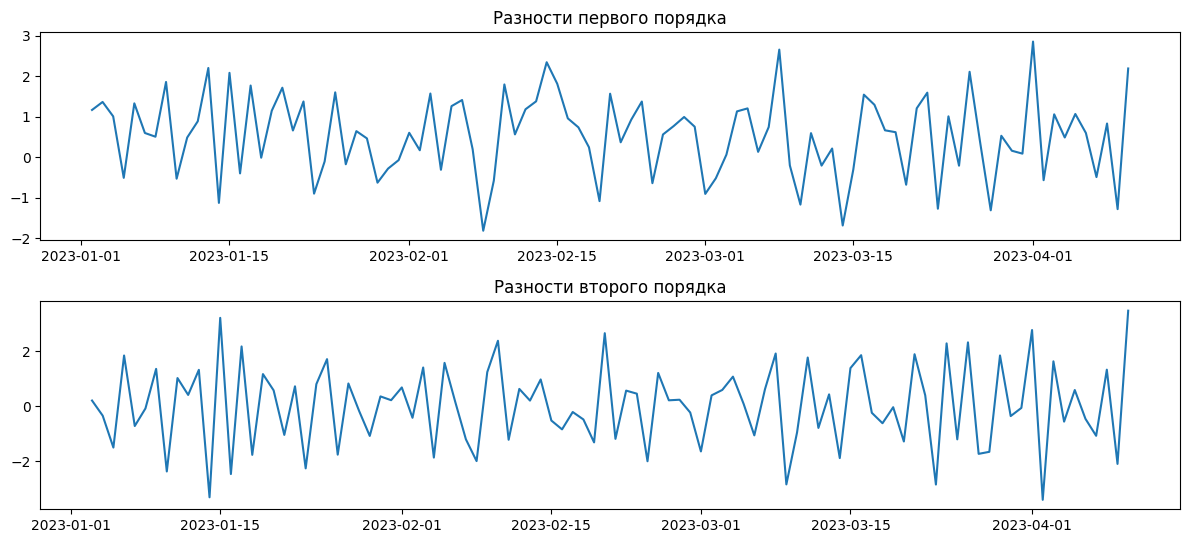

In [20]:
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
series = pd.Series(np.random.randn(100).cumsum() + 0.5 * np.arange(100), index=dates)

# Вычисляем разности первого порядка
diff1 = series.diff().dropna()

# Вычисляем разности второго порядка
diff2 = diff1.diff().dropna()

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 2)
plt.plot(diff1)
plt.title('Разности первого порядка')

plt.subplot(3, 1, 3)
plt.plot(diff2)
plt.title('Разности второго порядка')

plt.tight_layout()
plt.show()

Функции `plt.subplot(3, 1, 2)` и `plt.subplot(3, 1, 3)` создают подграфики в сетке из трёх строк и одного столбца. Аргументы означают:
- `3`: три строки (три подграфика, расположенных вертикально).
- `1`: один столбец (подграфики не делятся по горизонтали).
- `2` или `3`: номер подграфика (второй или третий), где будет отображён график.

`plt.subplot(3, 1, 2)` отображает разности первого порядка (убирают линейный тренд).
`plt.subplot(3, 1, 3)` отображает разности второго порядка (убирают более сложные тренды, например, квадратичные).

Эти подграфики позволяют сравнить исходный временной ряд и его разности на одной фигуре для анализа изменений в структуре данных.

# Первые разности и АКФ исходного и разностных рядов

Автокорреляционная функция измеряет корреляцию временного ряда с самим собой на разных лагах. Мы построили график АКФ для исходного ряда с 40 лагами, чтобы оценить его свойства. Медленный спад значений АКФ обычно свидетельствует о нестационарности ряда, так как каждое значение сильно коррелирует с предыдущими значениями из-за тренда.

Чтобы исследовать стационарность, мы вычисляем первые разности ряда, вычитая каждое значение из предыдущего, удаляя тренд. Используется функция `diff()`, а `dropna()` удаляет начальное значение NaN. Мы построили график дифферинцированного ряда, чтобы наглядно увидеть его поведение, ожидая, что тренд будет меньше, чем в оригинале. Затем построили АКФ дифференцированного ряда с 40 лагами. Быстрое падение АКФ указывает на то, что дифферинцирование сделало ряд стационарным.

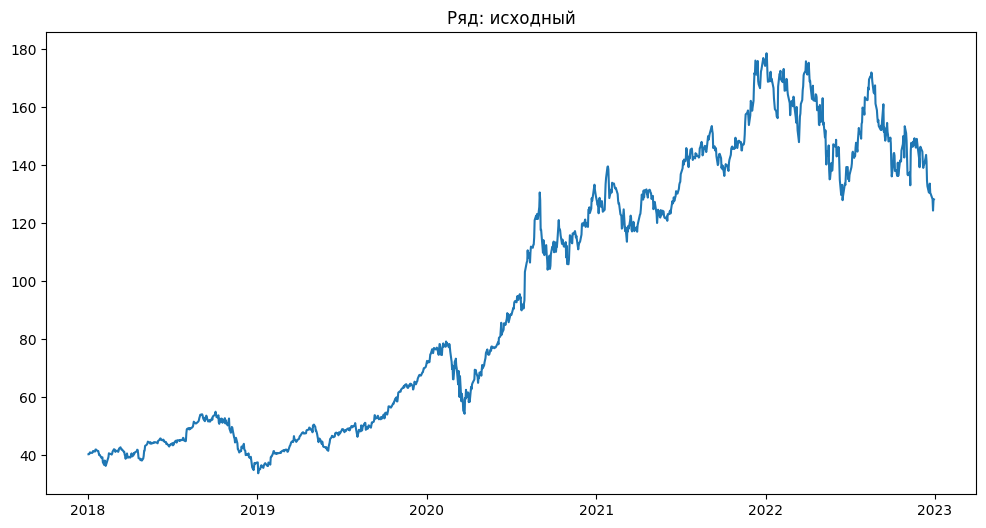

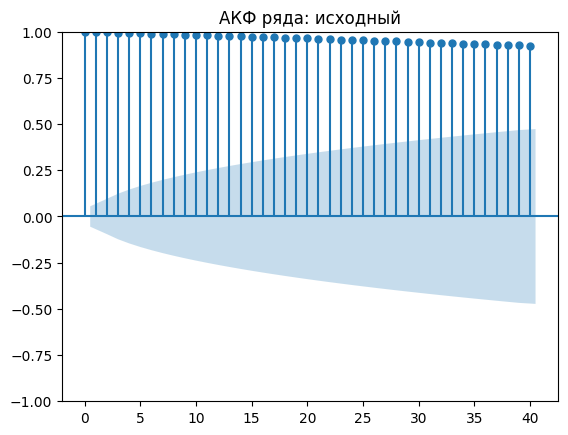

Статистика ADF для ряда исходный: -1.0638033834930576
p-значение: 0.7292888157312327
Вывод: ряд, вероятно, нестационарен.


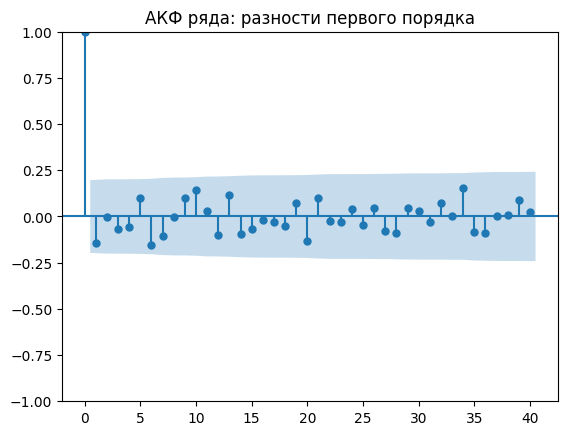

Статистика ADF для ряда разности первого порядка: -11.222494333685603
p-значение: 1.9974708579995866e-20
Вывод: ряд, вероятно, стационарен.


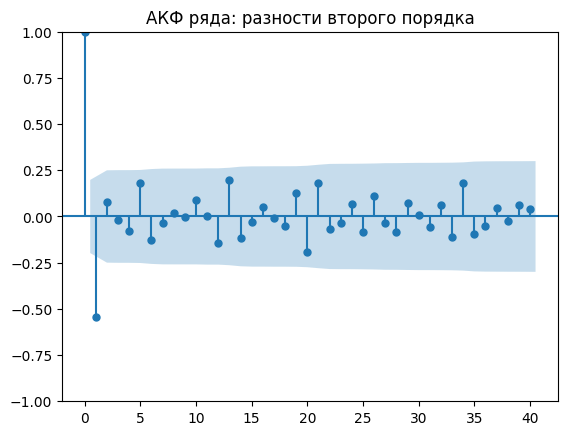

Статистика ADF для ряда разности второго порядка: -6.287719536977555
p-значение: 3.6631233892389454e-08
Вывод: ряд, вероятно, стационарен.


In [37]:
plt.figure(figsize=(12, 6))
plt.plot(closing_prices)
plt.title(f'Ряд: исходный')
plt.show()

# Функция, анализирующая временные ряды + тест Дики-Фуллера
def analyze_series(series, title):
    plot_acf(series, lags=40)
    plt.title(f'АКФ ряда: {title}')
    plt.show()

    result = adfuller(series)
    print(f'Статистика ADF для ряда {title}: {result[0]}')
    print(f'p-значение: {result[1]}')
    if result[1] <= 0.05:
        print('Вывод: ряд, вероятно, стационарен.')
    else:
        print('Вывод: ряд, вероятно, нестационарен.')

analyze_series(closing_prices, 'исходный')

diff1 = series.diff().dropna()
analyze_series(diff1, 'разности первого порядка')

diff2 = diff1.diff().dropna()
analyze_series(diff2, 'разности второго порядка')
plt.show()

# Анализ значений АКФ

- **Исходный ряд**: АКФ медленно убывает, со значительной положительной автокорреляцией на многих лагах. Это указывает на нестационарность, поскольку ряд сохраняет сильную память о прошлых значениях, вероятно, благодаря тренду. Для финансовых данных, таких как цены на акции, это напоминает случайное блуждание, когда значения сильно зависят от предыдущих.

- **Первые разности**: После дифференции АКФ резко падает почти до нуля после первого лага, при этом большинство последующих лагов находятся в пределах доверительного интервала (обычно около ±0,1). Это говорит о том, что дифферинцированный ряд является стационарным и ведет себя как белый шум с малой или нулевой автокорреляцией.

**Ключевые выводы**:
- Медленное затухание исходной АКФ свидетельствует о нестационарном процессе, управляемом трендом.
- Быстрый спад в дифферинцированной АКФ подтверждает, что первое дифферинцирование устраняет тренд, стабилизируя среднее значение.
- Периодические всплески не появляются ни в одной из АКФ, что указывает на отсутствие явной сезонности в ежедневных ценах на акции за этот период.

# Экспоненциальное сглаживание

Для сглаживания временных рядов мы вручную применяем одно экспоненциальное сглаживание. Функция принимает ряд и параметр сглаживания `alpha`, где более высокие значения придают больший вес недавним наблюдениям. Сглаженное значение на каждом шаге представляет собой средневзвешенное значение текущего наблюдения и предыдущего сглаженного значения. Мы построили график исходного и сглаженного ряда, чтобы сравнить их, отметив, как сглаживание уменьшает шум, сохраняя общую тенденцию.

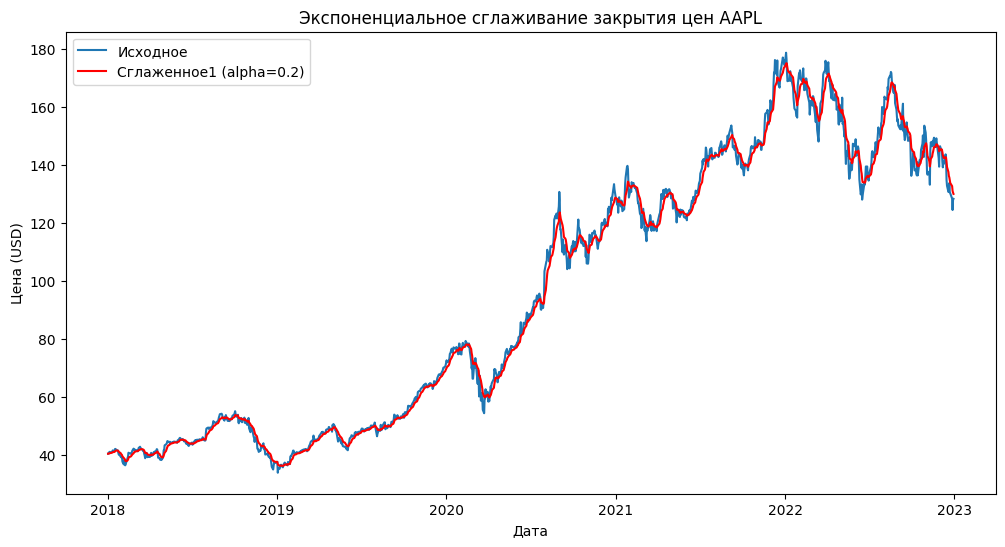

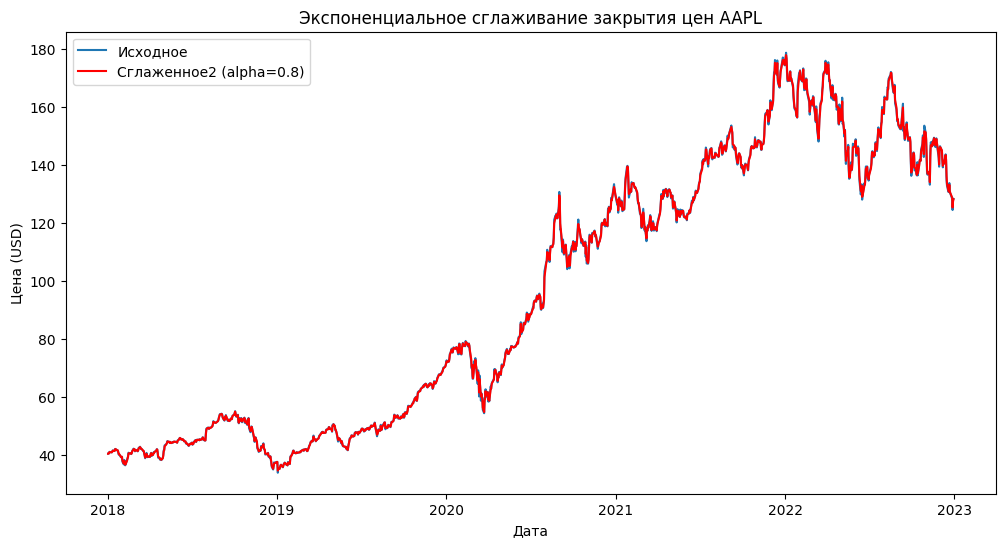

In [38]:
# Функция экспоненциального сглаживания
def exponential_smoothing(series, alpha):
    # Инициализируем список результатом с первым значением ряда
    result = [series.iloc[0]]
    # Проходим по всем индексам ряда, начиная со второго (n=1)
    for n in range(1, len(series)):
        # Вычисляем новое сглаженное значение:
        # alpha * текущее значение + (1 - alpha) * предыдущее сглаженное значение
        result.append(alpha * series.iloc[n] + (1 - alpha) * result[n-1])
    # Возвращаем список сглаженных значений
    return result

alpha1 = 0.2
alpha2 = 0.8

smoothed1 = exponential_smoothing(closing_prices, alpha1)
smoothed2 = exponential_smoothing(closing_prices, alpha2)

plt.figure(figsize=(12, 6))
plt.plot(closing_prices, label='Исходное')
plt.plot(closing_prices.index, smoothed1, label=f'Сглаженное1 (alpha={alpha1})', color='red')
plt.title('Экспоненциальное сглаживание закрытия цен AAPL')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(closing_prices, label='Исходное')
plt.plot(closing_prices.index, smoothed2, label=f'Сглаженное2 (alpha={alpha2})', color='red')
plt.title('Экспоненциальное сглаживание закрытия цен AAPL')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.show()

# Выводы

В этой работе мы проанализировали дневные цены закрытия AAPL с 2018 по 2023 год:

- **Исходный ряд**: АКФ показала медленное затухание, что указывает на нестационарность, характерную для цен на акции с трендом.
- **Первые разности**: Дифференцирование превратило ряд в стационарный, так как АКФ быстро упала до нуля, что указывает на поведение, похожее на белый шум.
- **Экспоненциальное сглаживание**: Используя `alpha1` = 0,2 и `alpha2` = 0,8, мы сгладили ряд, уловив тенденцию и уменьшив шум. Однако однократное экспоненциальное сглаживание предполагает отсутствие тренда или сезонности, поэтому оно может не полностью моделировать динамику цен на акции.

Анализ АКФ показал, как тренды влияют на стационарность и как дифферинцирование корректирует ее, давая представление о глубинной структуре ряда.